In [1]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
imgPath = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2022.03.10_000/plate_001'

In [3]:
cells = [c for c in os.listdir(imgPath) if os.path.isdir(os.path.join(imgPath,c))]
cells

['patch_attempt_0052_000',
 'patch_attempt_0056_000',
 'patch_attempt_0045_000',
 'patch_attempt_0054_000',
 'patch_attempt_0057_000',
 'patch_attempt_0049_000',
 'patch_attempt_0050_000',
 'patch_attempt_0047_000',
 'patch_attempt_0042_000',
 'patch_attempt_0063_000',
 'patch_attempt_0061_000',
 'patch_attempt_0060_000',
 'patch_attempt_0058_000',
 'patch_attempt_0059_000',
 'patch_attempt_0044_000',
 'patch_attempt_0046_000',
 'patch_attempt_0043_000',
 'patch_attempt_0053_000',
 'patch_attempt_0062_000',
 'patch_attempt_0051_000',
 'patch_attempt_0055_000']

/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2022.03.10_000/plate_001/patch_attempt_0052_000/camera_clamp1_000/000/Camera/frames.ma
/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2022.03.10_000/plate_001/patch_attempt_0056_000/camera_clamp1_000/000/Camera/frames.ma
/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2022.03.10_000/plate_001/patch_attempt_0054_000/camera_clamp1_000/000/Camera/frames.ma
/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2022.03.10_000/plate_001/patch_attempt_0057_000/camera_clamp1_000/000/Camera/frames.ma
/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2022.03.10_000/plate_001/patch_attempt_0063_000/camera_clamp1_000/000/Camera/frames.ma
/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2022.03.10_000/plate_001/patch_attempt_0061_000/camera_clamp1_000/000/Camera/frames.ma
/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2022.03.10_000/plate_001/patch_attempt_0060_000/camera_clamp1_000/000/Camera/frames.ma
/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw

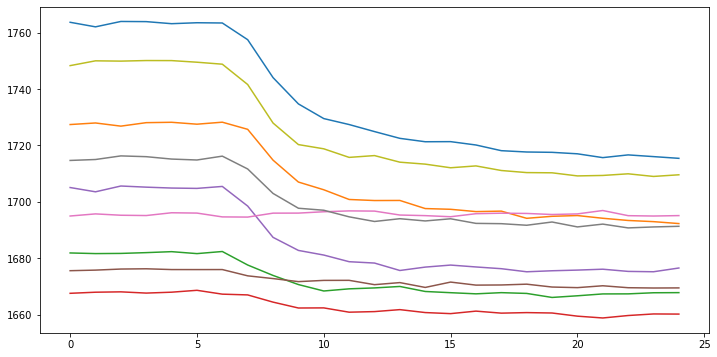

In [6]:
plt.figure(figsize=[12,6])
F_all = []
for cell in cells:
    imgFile = os.path.join(imgPath,cell,'camera_clamp1_000/000/Camera/frames.ma')
    if os.path.exists(imgFile):
        print(imgFile)
        imgData = h5py.File(imgFile,'r')
        imgArr = imgData['data'][()]
        F = []
        for frame in range(imgArr.shape[0]):
            f = np.mean(imgArr[frame,234:274,:])
            F.append(f)
        F_all.append(F)
        plt.plot(F[475:500])
        

In [7]:
# file = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2022.03.10_000/plate_001/patch_attempt_0063_000/camera_clamp1_000/000/Clamp1.ma'
file = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2022.03.10_000/plate_001/patch_attempt_0063_000/camera_clamp1_000/000/Camera/daqResult.ma'
# file = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2022.03.10_000/plate_001/patch_attempt_0063_000/camera_clamp1_000/000/Camera/frames.ma'

In [8]:
data = h5py.File(file,'r')

In [9]:
data.keys()

<KeysViewHDF5 ['data', 'info']>

In [10]:
data['data'][()].shape
# data['info']['0']['values']
# plt.plot(data['info']['0']['values'])

(2, 80000)

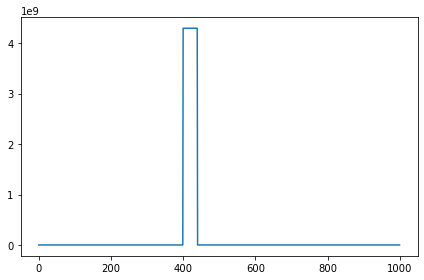

In [16]:
# plt.figure(figsize=[15,3])
x = np.arange(80000)/40000.0
plt.plot(data['data'][1][()][:1000])
plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/daq.png')
plt.show()

In [ ]:
np.mean(data['data'][2][()][30000:40000])-np.mean(data['data'][2][()][:10000])